# Zadanie 2 - Eksploracyjna analiza danych

Przedstaw w ciekawy sposób opis i wizyalizację danych zebranych w analizowanym zbiorze. \
W tym celu wykonaj poszczególne kroki oraz odpowiedz na postawione pytania badawcze.

##Utwórz kopię pliku na swoim dysku google. Zmień nazwę na R_Zadanie_2_imię_nazwisko.jpynb

## Zaimportuj pakiet Tidiverse

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


##Wczytaj plik
przygotowany na poprzednich zajęciach new_cocoa_imie_nazwisko.csv

In [56]:
df <- read.csv("new_cocoa_Lukasz_Burliga.csv")
head(df)

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Broad_Bean_Origin,is_dark_chocolate
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63,France,3.75,Sao Tome,No
2,A. Morin,Kpime,1676,2015,70,France,2.75,Togo,Yes
3,A. Morin,Atsane,1676,2015,70,France,3.00,Togo,Yes
4,A. Morin,Akata,1680,2015,70,France,3.50,Togo,Yes
5,A. Morin,Quilla,1704,2015,70,France,3.50,Peru,Yes
6,A. Morin,Carenero,1315,2014,70,France,2.75,Venezuela,Yes


## Statystyki opisowe i tabele liczności

Oblicz postawowe statystyki opisowe dla zmiennych numerycznych oraz tabele liczności dla zmiennych kategorycznych

In [40]:
cocoa_summary <- df %>%
  summarise(
    mean = mean(Cocoa_Percentage, na.rm = TRUE),
    median = median(Cocoa_Percentage, na.rm = TRUE),
    min = min(Cocoa_Percentage, na.rm = TRUE),
    max = max(Cocoa_Percentage, na.rm = TRUE),
    sd = sd(Cocoa_Percentage, na.rm = TRUE)
  )
print(cocoa_summary)

company_location_freq <- df %>%
  count(Company_Location) %>%
  arrange(desc(n))

print(company_location_freq)

      mean median min max       sd
1 71.69833     70  42 100 6.323118
    Company_Location   n
1             U.S.A. 764
2             France 156
3             Canada 125
4               U.K.  96
5              Italy  63
6            Ecuador  54
7          Australia  49
8            Belgium  40
9        Switzerland  38
10           Germany  35
11           Austria  26
12             Spain  25
13          Colombia  23
14           Hungary  22
15         Venezuela  20
16            Brazil  17
17             Japan  17
18        Madagascar  17
19       New Zealand  17
20              Peru  17
21           Denmark  15
22           Vietnam  11
23         Guatemala  10
24          Scotland  10
25         Argentina   9
26        Costa Rica   9
27            Israel   9
28            Poland   8
29          Honduras   6
30         Lithuania   6
31 Domincan Republic   5
32         Nicaragua   5
33       South Korea   5
34            Sweden   5
35         Amsterdam   4
36              Fiji   4
37   

Wykonaj histogram dla zmiennej *Rating*

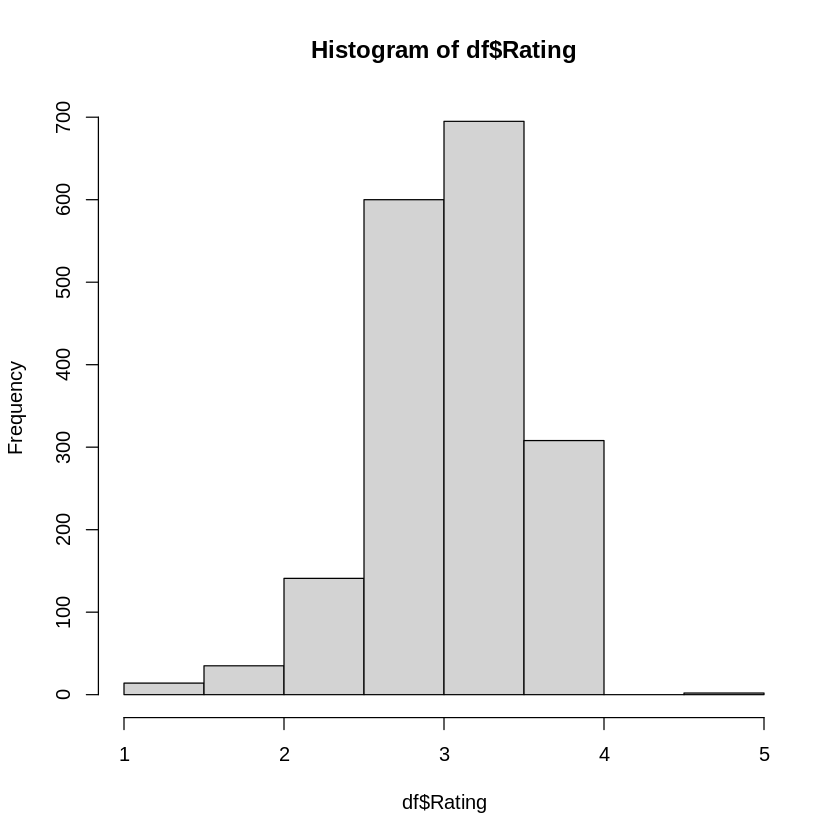

In [41]:
hist(df$Rating)

## EDA (Exploratory Data Analysis)
Przeprowadź eksploracyjną analizę danych. Spróbuj zaprezentować tak dane (wykresy lub tabele) aby odpowiedzieć na postawione poniżej pytania.

## PYTANIE 1 - Które kraje są największymi producentemi czekolady?

Selecting by n


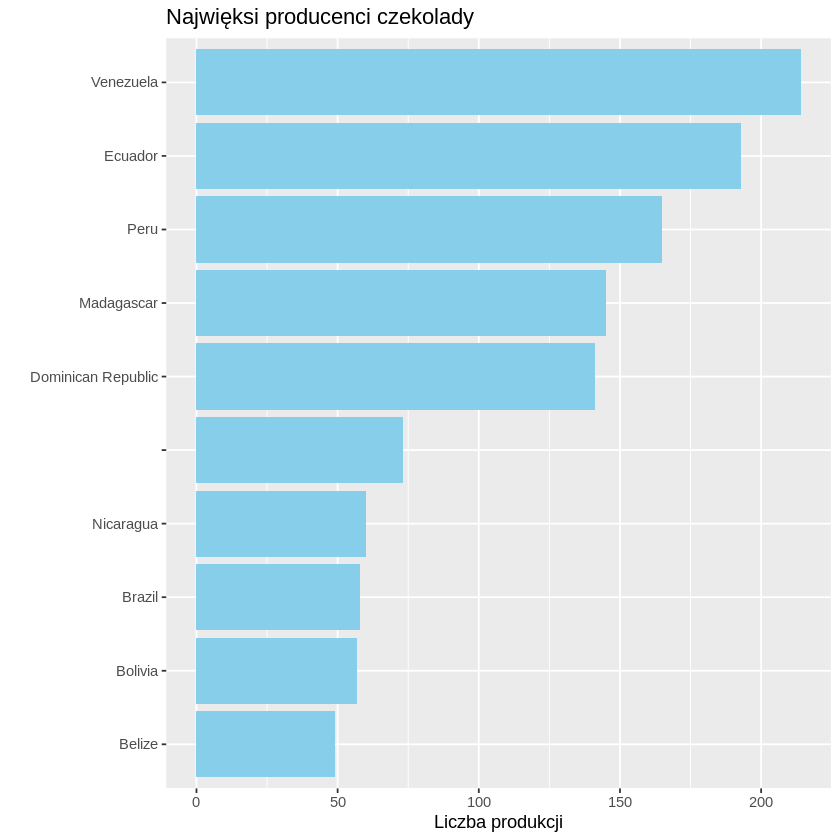

In [42]:
df %>%
  count(Broad_Bean_Origin) %>%
  top_n(10) %>%
  ggplot(aes(x = fct_reorder(Broad_Bean_Origin, n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(x = "", y = "Liczba produkcji", title = "Najwięksi producenci czekolady")

## PYTANIE 2 – Czy ocena zalezy od zawartości kako w czekoladzie?

`geom_smooth()` using formula = 'y ~ x'


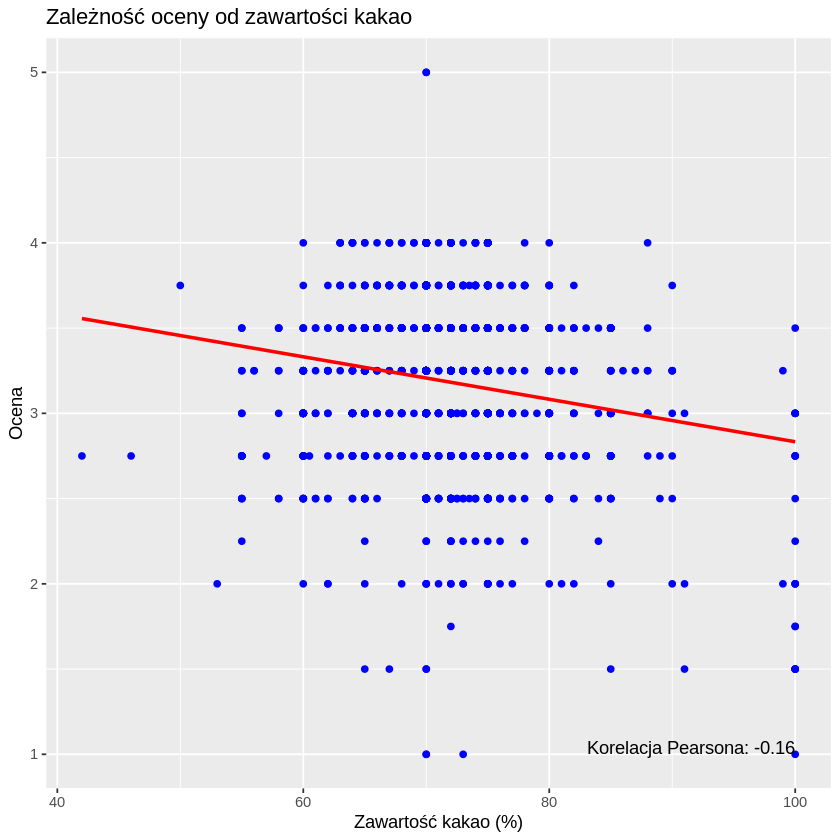

In [ ]:
correlation <- cor(df$Rating, df$Cocoa_Percentage, method = "pearson")

ggplot(df, aes(x = Cocoa_Percentage, y = Rating)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(x = "Zawartość kakao (%)", y = "Ocena", title = "Zależność oceny od zawartości kakao") +  # Etykiety osi i tytuł wykresu
  annotate("text", x = max(df$Cocoa_Percentage), y = min(df$Rating),
           label = paste("Korelacja Pearsona:", round(correlation, 2)), hjust = 1, vjust = 0)  # Dodanie adnotacji z wartością korelacji


Nie zależy

## PYTANIE 3 - Jakie są trendy produkcji czekolady zwykłej i gorzkiej na rynku światowym? Czy któryś z tych rodzajów jest bardziej popularny?

In [44]:
summary(df$Cocoa_Percentage)
summary(df$Rating)

# tabela liczności dla zmiennych kategorycznych
table(df$is_dark_chocolate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   42.0    70.0    70.0    71.7    75.0   100.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.875   3.250   3.186   3.500   5.000 


  No  Yes 
 328 1467 

Najbardziej popularną czekoladą jest gorzka.

## PYTANIE 4 - Który kraj ma najwyższe oceny czekolady?

In [ ]:
ratings_by_country <- df %>%
  group_by(Company_Location) %>%
  summarise(srednia_ocena = mean(Rating, na.rm = TRUE),
            proc_czek = mean(Cocoa_Percentage, na.rm = TRUE))

ratings_by_country <- ratings_by_country %>%
  arrange(desc(srednia_ocena))

print(ratings_by_country)

# A tibble: 60 × 3
   Company_Location srednia_ocena proc_czek
   <chr>                    <dbl>     <dbl>
 1 Chile                     3.75      70  
 2 Amsterdam                 3.5       73.2
 3 Netherlands               3.5       70  
 4 Philippines               3.5       65  
 5 Iceland                   3.42      68.7
 6 Vietnam                   3.41      74.5
 7 Brazil                    3.40      69.8
 8 Poland                    3.38      71.9
 9 Australia                 3.36      70.2
10 Guatemala                 3.35      70.2
# ℹ 50 more rows


Chile

## PYTANIE 6 – Jak zmieniały się oceny różnych rodzajów czekoladek na przestrzeni czasu?

[1] 0.0998465

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


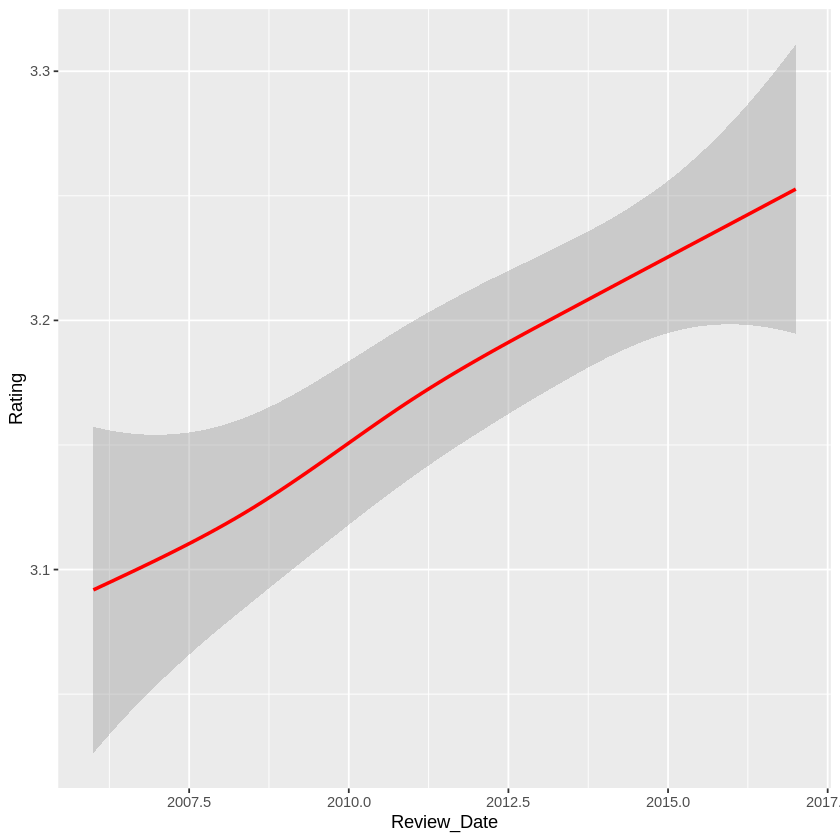

In [66]:
df$Days_Since_First_Review <- as.numeric(df$Review_Date - min(df$Review_Date))
cor(df$Review_Date, df$Rating)
ggplot(df, aes(Review_Date, Rating)) + geom_smooth(color = "red")


# Wnioski

Wizualizacja danych na wykresach pozwoliła na zobrazowanie zmian poszczególnych zmiennych na przestrzeni lat. Procent czekolady nie miał wpływu na zmianę ich oceny. Bardzo mało krajów będących największymi producentami czekolady, miały wysokie oceny. Średnia ocen czekolad wzrastała na przestrzeni lat (około 0.1 pkt na 7 lat).

##Pobierz plik (R_Zadanie_2_imię_nazwisko.jpynb) i prześlij na upel.